In [2]:
import json
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import json

## Lenet CNN on CIFAR 10 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt
import json

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the LeNet model architecture
def LeNet():
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)),
        AveragePooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        AveragePooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = LeNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('lenet_cifar10_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)


# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

with open('lenet_cifar10_results.json', 'w') as f:
    json.dump(results, f)





c:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.2507 - loss: 1.9941 - val_accuracy: 0.4172 - val_loss: 1.5892
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4429 - loss: 1.5304 - val_accuracy: 0.4700 - val_loss: 1.4419
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4775 - loss: 1.4340 - val_accuracy: 0.5000 - val_loss: 1.3916
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5080 - loss: 1.3675 - val_accuracy: 0.5148 - val_loss: 1.3562
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5305 - loss: 1.3092 - val_accuracy: 0.5235 - val_loss: 1.3284
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5495 - loss: 1.2659 - val_accuracy: 0.5439 - val_loss: 1.2627
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5626 - loss: 1.2311 - val_accuracy: 0.5423 - val_loss: 1.2918
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5758 - loss: 1.1888 - val_accu

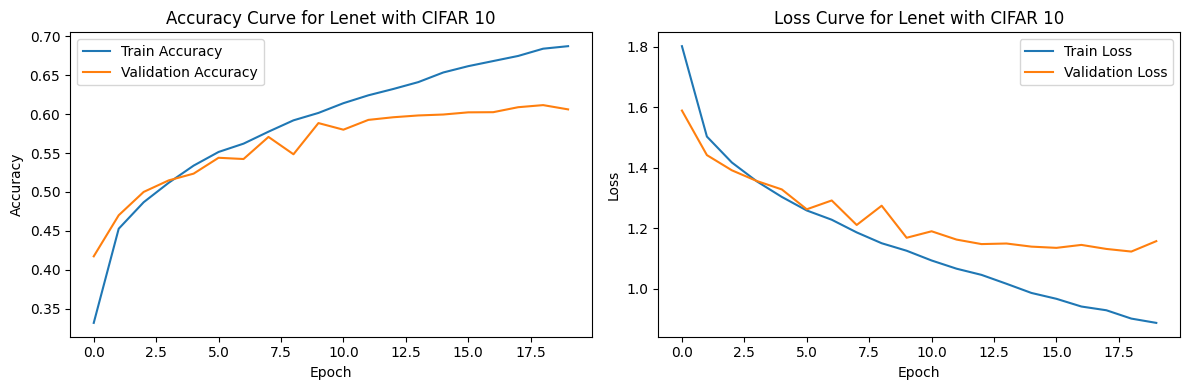

In [3]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for Lenet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for Lenet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## VGG with CIFAR 10

In [4]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt
import json

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# Define a simplified VGG-style model
def efficient_vgg():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.4),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = efficient_vgg()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('vgg_cifar10_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)


# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

with open('vgg_cifar10_results.json', 'w') as f:
    json.dump(results, f)






c:\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 114s 348ms/step - accuracy: 0.2708 - loss: 2.2090 - val_accuracy: 0.2069 - val_loss: 2.5765
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 350ms/step - accuracy: 0.4800 - loss: 1.4262 - val_accuracy: 0.5591 - val_loss: 1.2448
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 348ms/step - accuracy: 0.5756 - loss: 1.1893 - val_accuracy: 0.6294 - val_loss: 1.0547
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 351ms/step - accuracy: 0.6347 - loss: 1.0422 - val_accuracy: 0.6897 - val_loss: 0.8842
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 350ms/step - accuracy: 0.6720 - loss: 0.9322 - val_accuracy: 0.6851 - val_loss: 0.8996
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 348ms/step - accuracy: 0.6996 - loss: 0.8655 - val_accuracy: 0.7296 - val_loss: 0.8002
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 351ms/step - accuracy: 0.7227 - loss: 0.7966 - val_accuracy: 0.7627 - val_loss: 0.6822
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 111s 353ms/step - accuracy: 0.7466 -

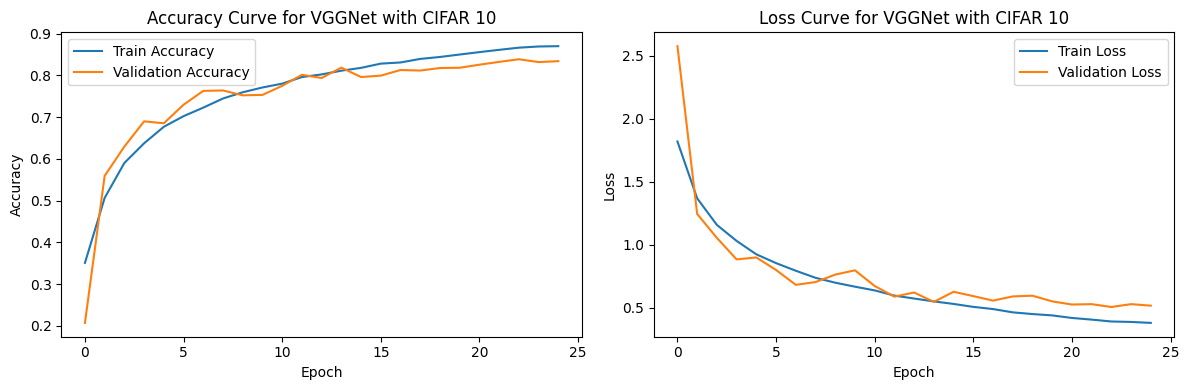

In [5]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for VGGNet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for VGGNet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## AlexNET with CIFAR-10

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=15
)
datagen.fit(x_train)

# Build AlexNet model
def build_alexnet(input_shape=(32, 32, 3), num_classes=10):
    model = Sequential([
        # Layer 1: Convolutional Layer
        Conv2D(96, (3, 3), strides=1, padding="same", activation="relu", input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2),

        # Layer 2: Convolutional Layer
        Conv2D(256, (3, 3), padding="same", activation="relu"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2),

        # Layer 3: Convolutional Layer
        Conv2D(384, (3, 3), padding="same", activation="relu"),
        BatchNormalization(),

        # Layer 4: Convolutional Layer
        Conv2D(384, (3, 3), padding="same", activation="relu"),
        BatchNormalization(),

        # Layer 5: Convolutional Layer
        Conv2D(256, (3, 3), padding="same", activation="relu"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=2),

        # Flatten the feature maps
        Flatten(),

        # Fully Connected Layer 1
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),

        # Fully Connected Layer 2
        Dense(256, activation="relu"),
        BatchNormalization(),
        Dropout(0.5),

        # Output Layer
        Dense(num_classes, activation="softmax")
    ])
    return model

# Build and compile the model
model = build_alexnet()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks for training
callbacks = [
    EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4)
]

# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    validation_data=(x_test, y_test),
    epochs=50,
    callbacks=callbacks,
    verbose=2
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('alexnet_cifar10_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)

# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

with open('alexnet_cifar10_results.json', 'w') as f:
    json.dump(results, f)


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import json

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Define the AlexNet model architecture
def AlexNet():
    model = Sequential([
        # First convolutional block
        Conv2D(96, (11, 11), activation='relu', strides=(4, 4), padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),
        Dropout(0.25),
        
        # Second convolutional block
        Conv2D(256, (5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),
        Dropout(0.25),
        
        # Third convolutional block
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        
        # Fourth convolutional block
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        
        # Fifth convolutional block
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),
        Dropout(0.25),
        
        # Flattening the output to feed into fully connected layers
        Flatten(),
        
        # Fully connected layers
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        # Output layer
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = AlexNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('alexnet_cifar10_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)

# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

with open('alexnet_cifar10_results.json', 'w') as f:
    json.dump(results, f)


Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 164s 512ms/step - accuracy: 0.0976 - loss: 2.3052 - val_accuracy: 0.1003 - val_loss: 2.3028
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 167s 534ms/step - accuracy: 0.1012 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3029
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 246s 672ms/step - accuracy: 0.1039 - loss: 2.3026 - val_accuracy: 0.0997 - val_loss: 2.3027
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 157s 501ms/step - accuracy: 0.1009 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 157s 503ms/step - accuracy: 0.1009 - loss: 2.3028 - val_accuracy: 0.0952 - val_loss: 2.3028
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 158s 506ms/step - accuracy: 0.0975 - loss: 2.3027 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 153s 490ms/step - accuracy: 0.0980 - loss: 2.3026 - val_accuracy: 0.0952 - val_loss: 2.3027
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 153s 489ms/step - accuracy: 0.1010 -

c:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

Precision: 0.01
Recall: 0.1
F1 Score: 0.01818181818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      1.00      0.18      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



##Alexnet with CIFAR 10 -check accuracy 

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import json

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define AlexNet-inspired model
def improved_alexnet():
    model = Sequential([
        # Layer 1
        Conv2D(96, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Layer 2
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Layer 3
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        # Layer 4
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        # Layer 5
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Fully Connected Layers
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = improved_alexnet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('alexnet_cifar10_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)

# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

with open('alexnet_cifar10_results.json', 'w') as f:
    json.dump(results, f)




Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - accuracy: 0.2593 - loss: 2.3273 - val_accuracy: 0.1274 - val_loss: 2.9759
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - accuracy: 0.4785 - loss: 1.4414 - val_accuracy: 0.4574 - val_loss: 1.5548
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 480s 2s/step - accuracy: 0.6012 - loss: 1.1537 - val_accuracy: 0.4917 - val_loss: 1.4905
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 492s 2s/step - accuracy: 0.6678 - loss: 0.9673 - val_accuracy: 0.6134 - val_loss: 1.1140
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1082s 3s/step - accuracy: 0.7272 - loss: 0.8133 - val_accuracy: 0.7203 - val_loss: 0.8376
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 556s 2s/step - accuracy: 0.7715 - loss: 0.6935 - val_accuracy: 0.6446 - val_loss: 1.0545
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 548s 2s/step - accuracy: 0.8092 - loss: 0.5786 - val_accuracy: 0.7356 - val_loss: 0.7763
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 503s 2s/step - accuracy: 0.8447 - loss: 0.4802 - val_acc

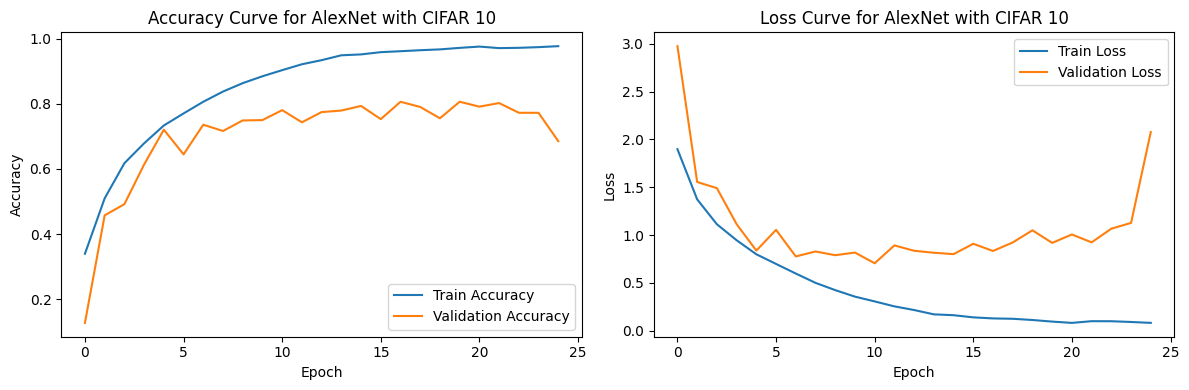

In [7]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for AlexNet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for AlexNet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Googlenet with CIFAR-10

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import json

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the Inception module
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), activation='relu', padding='same')(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), activation='relu', padding='same')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), activation='relu', padding='same')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), activation='relu', padding='same')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), activation='relu', padding='same')(conv_5x5)

    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), activation='relu', padding='same')(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=-1)
    return output


# Define the GoogLeNet model architecture
def GoogLeNet():
    input_layer = Input(shape=(32, 32, 3))

    # Initial layers
    x = Conv2D(64, (7, 7), strides=(1, 1), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = Conv2D(64, (1, 1), activation='relu', padding='same')(x)
    x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, 192, 96, 208, 16, 48, 64)
    x = inception_module(x, 160, 112, 224, 24, 64, 64)
    x = inception_module(x, 128, 128, 256, 24, 64, 64)
    x = inception_module(x, 112, 144, 288, 32, 64, 64)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Final layers (adjusted pooling size to fit the tensor shape)
    x = AveragePooling2D((2, 2), strides=(1, 1))(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    output_layer = Dense(10, activation='softmax')(x)

    model = Model(input_layer, output_layer)
    return model


# Compile the model
model = GoogLeNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('googlenet_cifar10_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)

# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

with open('googlenet_cifar10_results.json', 'w') as f:
    json.dump(results, f)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 217s 646ms/step - accuracy: 0.1358 - loss: 2.2418 - val_accuracy: 0.3158 - val_loss: 1.8114
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 192s 614ms/step - accuracy: 0.3485 - loss: 1.7232 - val_accuracy: 0.4471 - val_loss: 1.4904
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 191s 610ms/step - accuracy: 0.4451 - loss: 1.4963 - val_accuracy: 0.4652 - val_loss: 1.4634
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 192s 613ms/step - accuracy: 0.5068 - loss: 1.3478 - val_accuracy: 0.5360 - val_loss: 1.2781
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 190s 606ms/step - accuracy: 0.5538 - loss: 1.2152 - val_accuracy: 0.5629 - val_loss: 1.2037
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 193s 616ms/step - accuracy: 0.5978 - loss: 1.1162 - val_accuracy: 0.5603 - val_loss: 1.2138
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 192s 614ms/step - accuracy: 0.6211 - loss: 1.0435 - val_accuracy: 0.6333 - val_loss: 1.0367
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 193s 615ms/step - accuracy: 0.6659 -

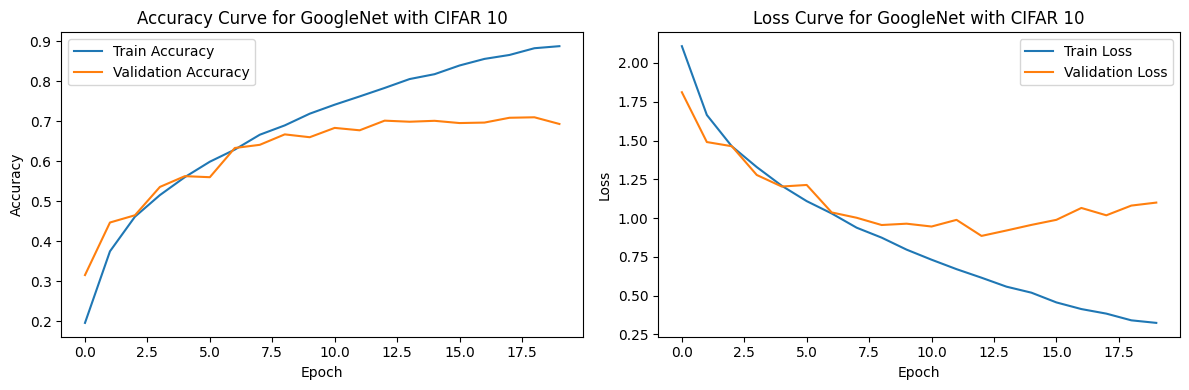

In [6]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for GoogleNet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for GoogleNet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## XceptionNet with CIFAR-10

In [1]:
from tensorflow.keras.applications import Xception
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import json

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Resize images to 71x71 for compatibility with Xception
train_images = tf.image.resize(train_images, (71, 71))
test_images = tf.image.resize(test_images, (71, 71))

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Define the Xception model architecture
def XceptionNet():
    base_model = Xception(input_shape=(71, 71, 3), include_top=False, weights=None)  # Do not load pretrained weights
    model = Sequential([
        base_model,
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = XceptionNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('xception_cifar10_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)

# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

with open('xceptionnet_cifar10_results.json', 'w') as f:
    json.dump(results, f)


Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1915s 6s/step - accuracy: 0.2951 - loss: 2.3136 - val_accuracy: 0.0997 - val_loss: 2.3020
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1880s 6s/step - accuracy: 0.5962 - loss: 1.1537 - val_accuracy: 0.5708 - val_loss: 1.1967
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2084s 7s/step - accuracy: 0.7019 - loss: 0.8777 - val_accuracy: 0.6186 - val_loss: 1.4573
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1947s 6s/step - accuracy: 0.7602 - loss: 0.7146 - val_accuracy: 0.7518 - val_loss: 0.7642
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1651s 5s/step - accuracy: 0.8073 - loss: 0.5756 - val_accuracy: 0.1232 - val_loss: 91.7007
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1884s 6s/step - accuracy: 0.8134 - loss: 0.5622 - val_accuracy: 0.4278 - val_loss: 6.3633
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1964s 6s/step - accuracy: 0.8262 - loss: 0.5202 - val_accuracy: 0.7860 - val_loss: 0.6756
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1785s 6s/step - accuracy: 0.8801 - loss: 0.3645 -

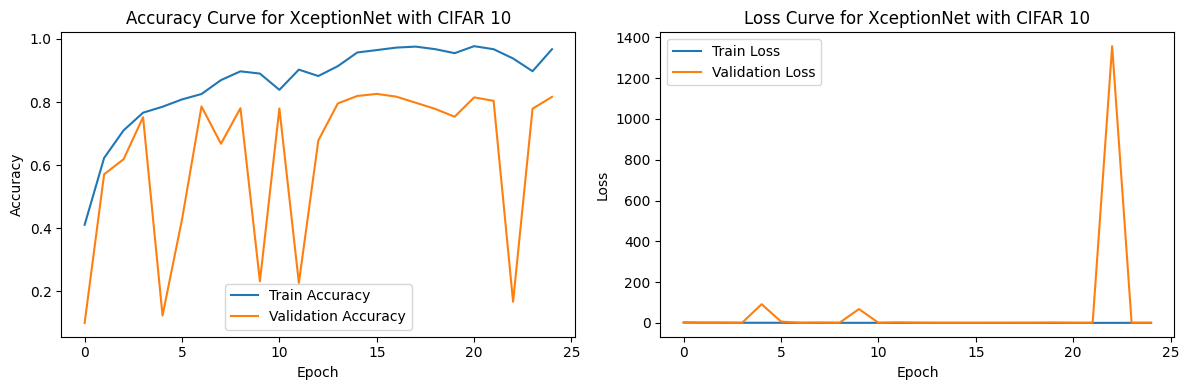

In [2]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for XceptionNet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for XceptionNet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



## SENet (Squeeze-and-Excitation Networks)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt
import json

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)



# Define the SENet-like model architecture (Using ResNet50)
def SENet():
    base_model = ResNet50(input_shape=(32, 32, 3), include_top=False, weights=None)  # Do not load pretrained weights
    model = Sequential([
        base_model,
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = SENet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('senet_cifar10_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)


# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

with open('senet_cifar10_results.json', 'w') as f:
    json.dump(results, f)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 546s 2s/step - accuracy: 0.2215 - loss: 2.7502 - val_accuracy: 0.1523 - val_loss: 2.3726
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1079s 3s/step - accuracy: 0.4524 - loss: 1.5236 - val_accuracy: 0.4457 - val_loss: 1.5068
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1026s 3s/step - accuracy: 0.5260 - loss: 1.3482 - val_accuracy: 0.4460 - val_loss: 1.7248
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 402s 1s/step - accuracy: 0.5563 - loss: 1.2716 - val_accuracy: 0.3531 - val_loss: 1.8837
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 403s 1s/step - accuracy: 0.5818 - loss: 1.1837 - val_accuracy: 0.5079 - val_loss: 1.5356
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 508s 1s/step - accuracy: 0.6394 - loss: 1.0370 - val_accuracy: 0.4401 - val_loss: 1.7495
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 471s 1s/step - accuracy: 0.6507 - loss: 1.0024 - val_accuracy: 0.5491 - val_loss: 1.3561
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - accuracy: 0.6357 - loss: 1.0523 - val_ac

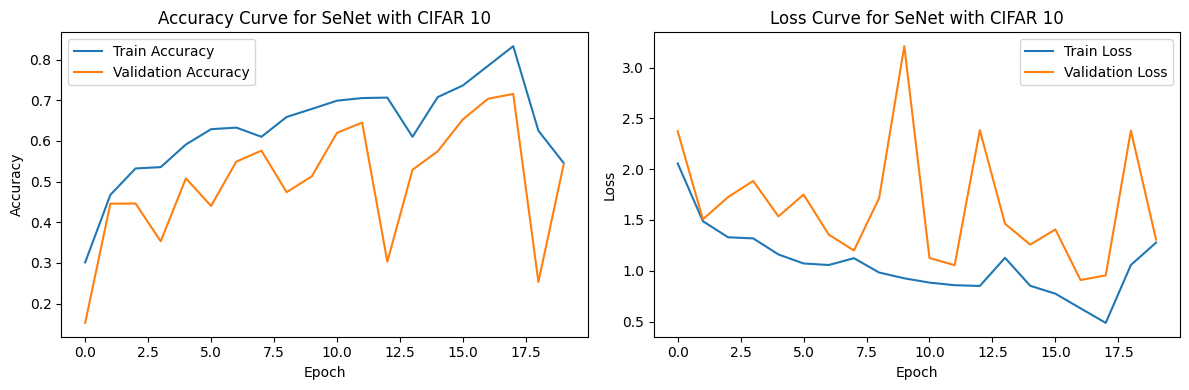

In [2]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for SeNet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for SeNet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## ResNet with CIFAR 10

In [3]:
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report
import matplotlib.pyplot as plt
import json


# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


# Define the ResNet model architecture
def ResNetNet():
    base_model = ResNet50(input_shape=(32, 32, 3), include_top=False, weights=None)  # Do not load pretrained weights
    model = Sequential([
        base_model,
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = ResNetNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('resnet_cifar10_model.keras')

# Calculate precision, recall, and F1-score
test_predictions = model.predict(test_images)
test_predictions_class = test_predictions.argmax(axis=1)
test_labels_class = test_labels.argmax(axis=1)

precision = precision_score(test_labels_class, test_predictions_class, average='weighted')
recall = recall_score(test_labels_class, test_predictions_class, average='weighted')
f1 = f1_score(test_labels_class, test_predictions_class, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Classification Report
class_report = classification_report(test_labels_class, test_predictions_class)
print("Classification Report:")
print(class_report)


# Save the results to a JSON file
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

with open('resnet_cifar10_results.json', 'w') as f:
    json.dump(results, f)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 456s 1s/step - accuracy: 0.2272 - loss: 2.7739 - val_accuracy: 0.2142 - val_loss: 2.2309
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 414s 1s/step - accuracy: 0.4494 - loss: 1.5329 - val_accuracy: 0.4353 - val_loss: 1.5881
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.5106 - loss: 1.3690 - val_accuracy: 0.4910 - val_loss: 1.4118
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.5541 - loss: 1.2719 - val_accuracy: 0.4962 - val_loss: 1.4589
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 393s 1s/step - accuracy: 0.5926 - loss: 1.1658 - val_accuracy: 0.5510 - val_loss: 1.3668
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 394s 1s/step - accuracy: 0.6363 - loss: 1.0594 - val_accuracy: 0.4018 - val_loss: 1.7463
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.6457 - loss: 1.0361 - val_accuracy: 0.5677 - val_loss: 1.2675
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1041s 3s/step - accuracy: 0.6960 - loss: 0.8892 - val_acc

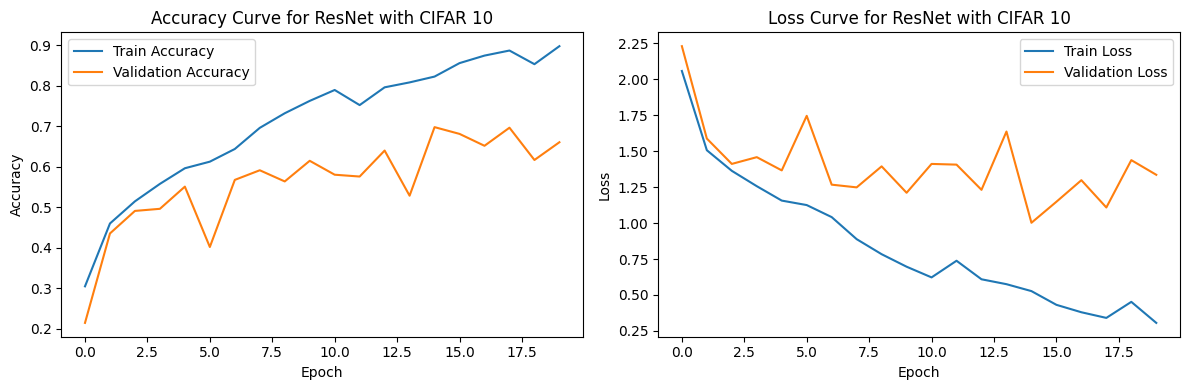

In [4]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve for ResNet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve for ResNet with CIFAR 10')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Code to compare loss and accuracy curves for all the CNN models with Fashion MNSIT dataset

In [8]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import json

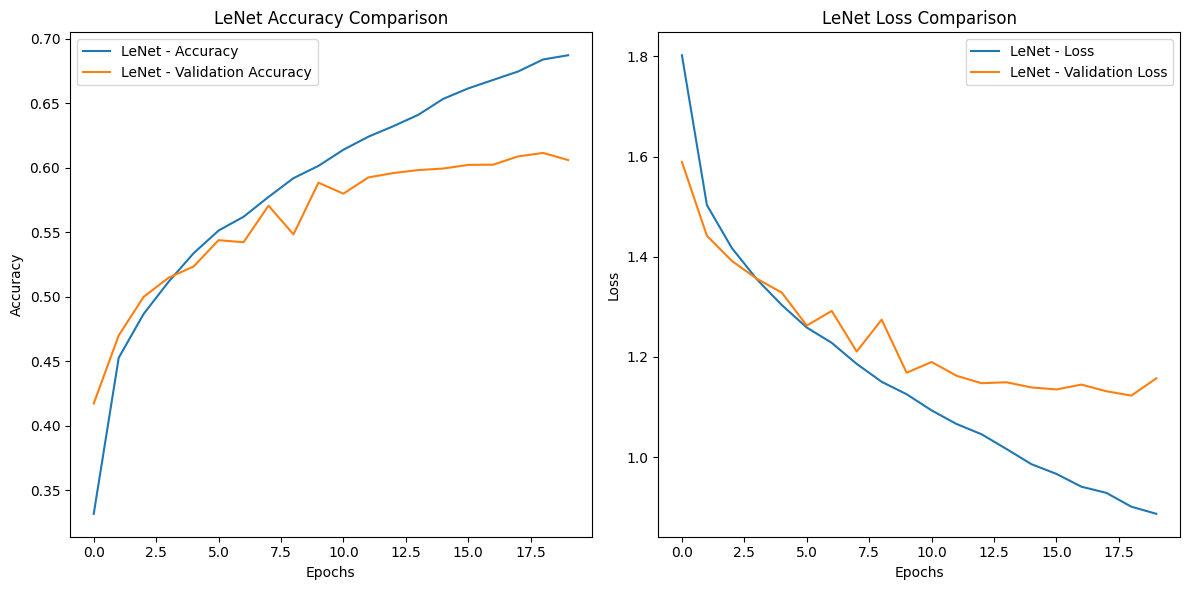

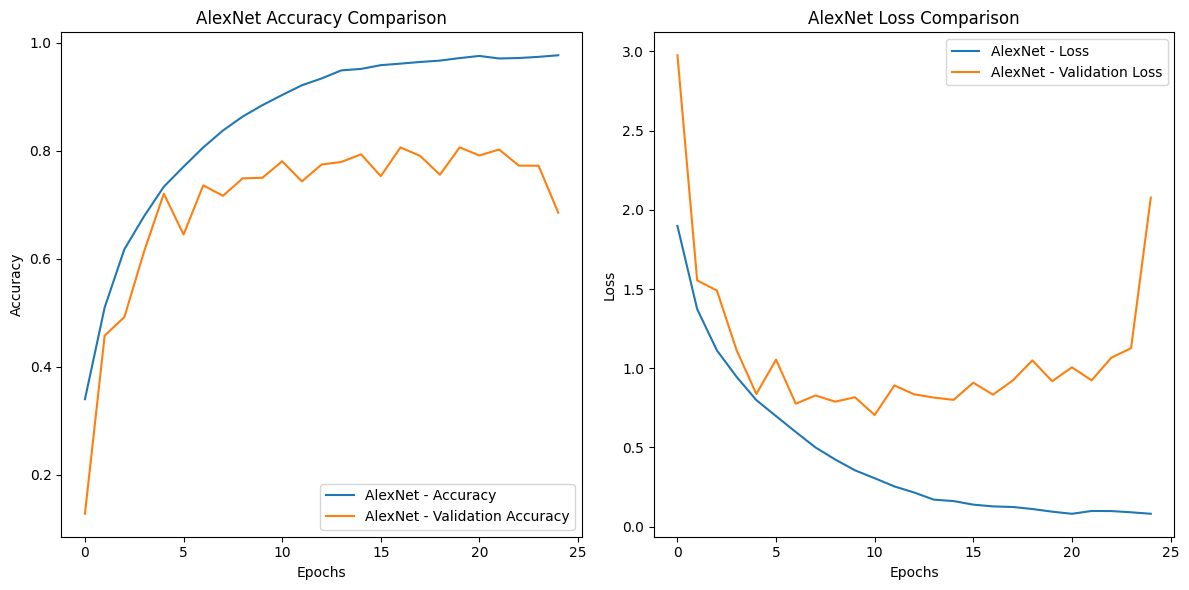

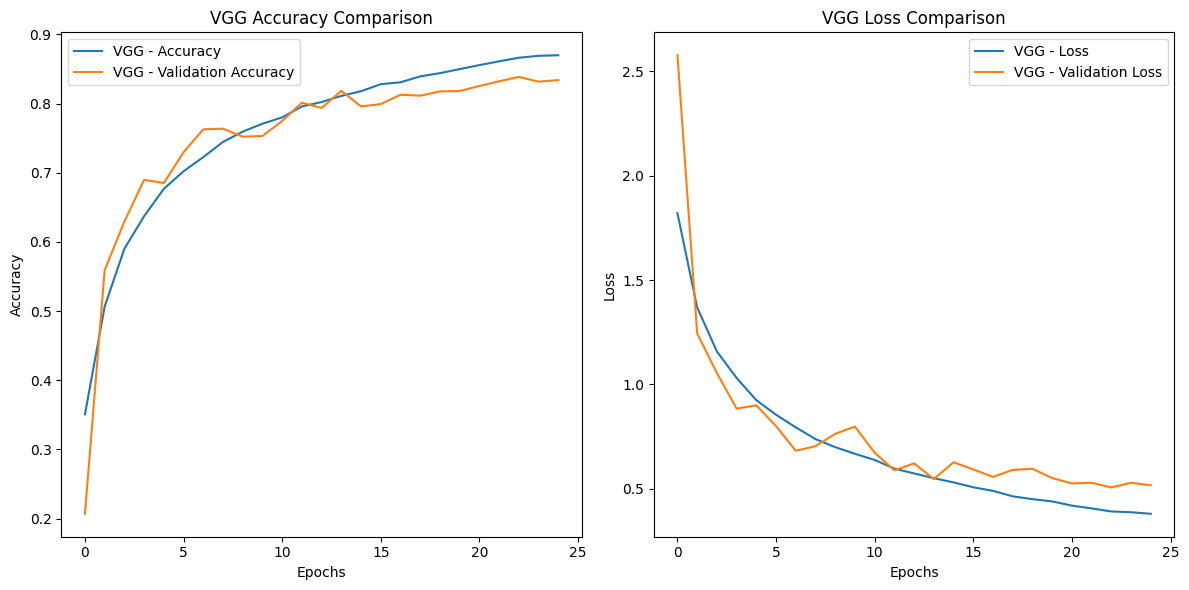

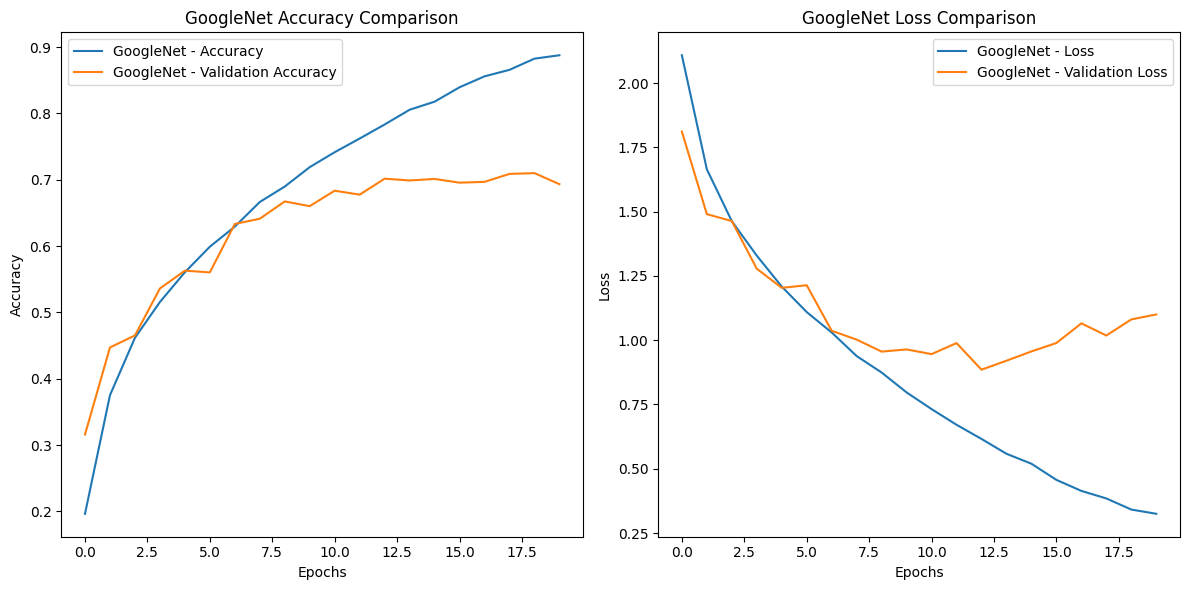

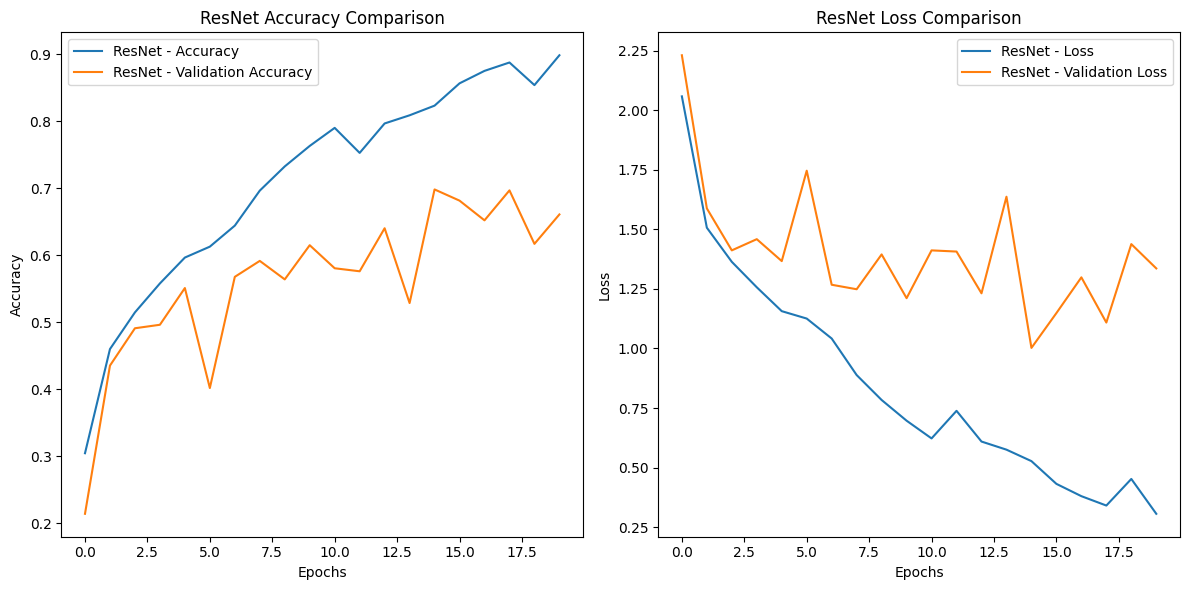

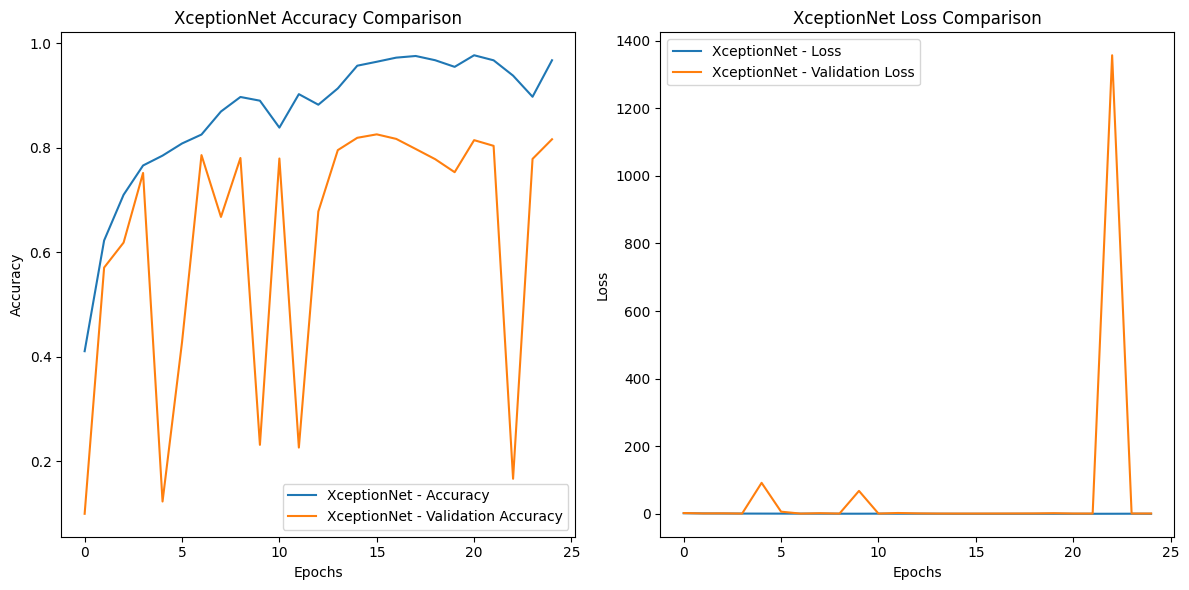

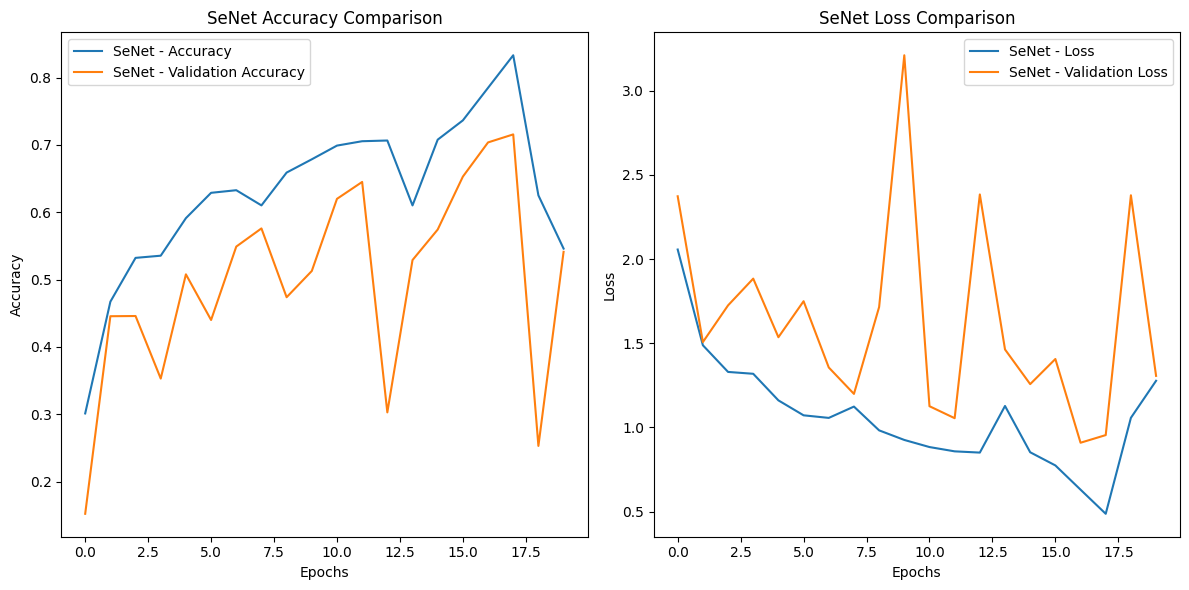

In [10]:
# Loading the saved models and results
def load_model_and_results(model_name):
    model = load_model(f'{model_name.lower()}_cifar10_model.keras')
    with open(f'{model_name.lower()}_cifar10_results.json', 'r') as f:
        results = json.load(f)
    return model, results

# Function to plot the saved models' accuracy and loss
def plot_saved_model_results(model_name):
    # Load the saved model and results
    _, results = load_model_and_results(model_name)
    
    # Get the history from the loaded results
    history = results['history']
    
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label=f'{model_name} - Accuracy')
    plt.plot(history['val_accuracy'], label=f'{model_name} - Validation Accuracy')
    plt.title(f'{model_name} Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label=f'{model_name} - Loss')
    plt.plot(history['val_loss'], label=f'{model_name} - Validation Loss')
    plt.title(f'{model_name} Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot results for saved models
plot_saved_model_results('LeNet')
plot_saved_model_results('AlexNet')
plot_saved_model_results('VGG')
plot_saved_model_results('GoogleNet')
plot_saved_model_results('ResNet')
plot_saved_model_results('XceptionNet')
plot_saved_model_results('SeNet')